## HW3: K Means Clustering

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("data-hw3.txt", delimiter="\t")
df

,College,Win_2015,Win_2017,Rank_2015,Rank_2017
0,Alabama,12,11,2,4
1,Clemson,13,12,1,1
2,LSU,8,9,22,16
3,Michigan State,12,9,3,18
4,Northwestern,10,9,8,14
5,Notre Dame,10,9,8,14
6,Ohio State,11,11,7,5
7,Oklahoma,11,12,4,2
8,Oklahoma State,10,9,13,17
9,Stanford,11,9,5,15


In [2]:
objects = []
instances = []
for instance in df.to_numpy():
    objects.append(instance[0])
    featureValues = list(instance[1:])
    instances.append(featureValues)
nInstances = len(instances)
print("Number of instances:", nInstances)
objects

Number of instances: 12


['Alabama',
 'Clemson',
 'LSU',
 'Michigan State',
 'Northwestern',
 'Notre Dame',
 'Ohio State',
 'Oklahoma',
 'Oklahoma State',
 'Stanford',
 'TCU',
 'Wisconsin']

In [3]:
X = np.array(instances)
X

array([[12, 11,  2,  4],
       [13, 12,  1,  1],
       [ 8,  9, 22, 16],
       [12,  9,  3, 18],
       [10,  9,  8, 14],
       [10,  9,  8, 14],
       [11, 11,  7,  5],
       [11, 12,  4,  2],
       [10,  9, 13, 17],
       [11,  9,  5, 15],
       [10, 10, 11, 13],
       [ 9, 12, 23,  6]])

### Q1: Compare Initial Centroids

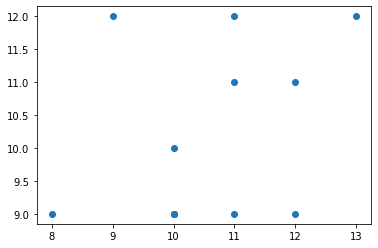

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

1) Initial centroids: (7, 7) and (14, 14)

In [5]:
## TODO: K Means clustering (K = 2, Euclidean distance)

# if p1 = [x1, y1] and p2 = [x2, y2]his will return euclidian distance
def eucDist(p1, p2):
    return (((p2[0] - p1[0]) ** 2) + ((p2[1] - p1[1]) ** 2)) ** 0.5

def manDist(p1, p2):
    return sum(abs(val1-val2) for val1, val2, in zip(p1, p2))

def ptAvg(points):
    sumX = sum(p[0] for p in points)
    sumY = sum(p[1] for p in points)
    
    return [sumX/len(points), sumY/len(points)]

# Takes in instances and initial centroids and does k means clustering
def clustering(points, centroids, old_clusters, euclidian=True):
    
    # Find distances to each centroid from each point
    distances = []
    for pt in points:
        ptDists = []
        for cent in centroids:
            if euclidian:
                ptDists.append(eucDist(cent, pt))
            else:
                ptDists.append(manDist(cent, pt))
        
        distances.append(ptDists)
    
    # Find each centroid's cluster points
    clusters = [[] for i in centroids]
    for i, point in enumerate(distances):
        minDist = 1000000
        minIndex = 0
        for y, dist in enumerate(point):
            if dist < minDist:
                minDist = dist
                minIndex = y
        
        clusters[minIndex].append(points[i])
    
    # Terminate if no changes to cluster occur
    if clusters == old_clusters: 
        return centroids, clusters
    
    
    # Find new centroids
    new_centroids = []
    for cluster in clusters:
        new_centroids.append(ptAvg(cluster))
        
    # Run again
    return clustering(points, new_centroids, clusters, euclidian=euclidian) 
    

points = []
for inst in X:
    points.append([inst[0], inst[1]])
    
centroids, clusters = clustering(points, [[7, 7], [14, 14]], [])

print(centroids)
print(clusters)
    

[[10.0, 9.5], [11.75, 11.5]]
[[[8, 9], [12, 9], [10, 9], [10, 9], [10, 9], [11, 9], [10, 10], [9, 12]], [[12, 11], [13, 12], [11, 11], [11, 12]]]


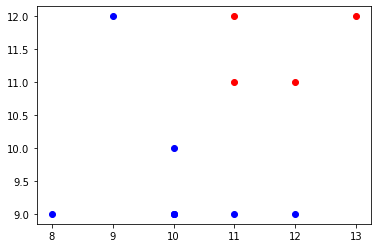

In [6]:
## TODO: Visualization
colors = ['blue', 'red']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:,0], cluster[:,1], c=colors[i])

2) Initial centroids: (7, 7) and (7, 14)

In [7]:
## TODO: K Means clustering (K = 2, Euclidean distance)

points = []
for inst in X:
    points.append([inst[0], inst[1]])
    
centroids, clusters = clustering(points, [[7, 7], [7, 14]], [])
print(centroids)
print(clusters)

[[10.142857142857142, 9.142857142857142], [11.2, 11.6]]
[[[8, 9], [12, 9], [10, 9], [10, 9], [10, 9], [11, 9], [10, 10]], [[12, 11], [13, 12], [11, 11], [11, 12], [9, 12]]]


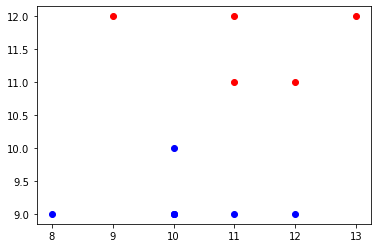

In [8]:
## TODO: Visualization (2 clusters)
colors = ['blue', 'red']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:,0], cluster[:,1], c=colors[i])

### Q2: Compare Features

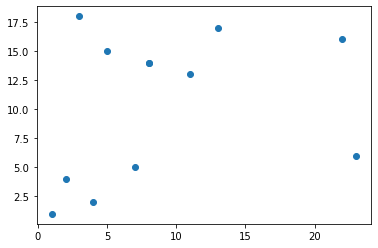

In [9]:
plt.scatter(X[:,2], X[:,3])

Initial centroids: (1, 1) and (25, 25), Manhattan distance

In [10]:
## TODO: K Means clustering (K = 2, Manhattan distance)
points = []
for inst in X:
    points.append([inst[2], inst[3]])
    
centroids, clusters = clustering(points, [[1, 1], [25, 25]], [], euclidian=False)
print(centroids)
print(clusters)

[[4.75, 9.125], [17.25, 13.0]]
[[[2, 4], [1, 1], [3, 18], [8, 14], [8, 14], [7, 5], [4, 2], [5, 15]], [[22, 16], [13, 17], [11, 13], [23, 6]]]


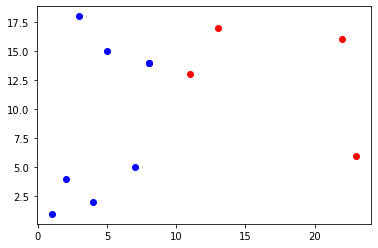

In [11]:
## TODO: Visualization (2 clusters)
colors = ['blue', 'red']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:,0], cluster[:,1], c=colors[i])

### Q3: Choose a good K

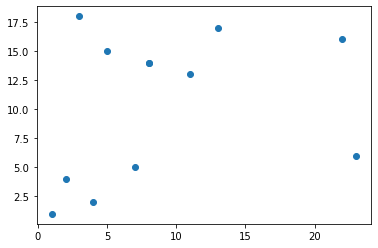

In [12]:
plt.scatter(X[:,2], X[:,3])

Suppose K = 3. Specify three initial centroids by yourself. Manhattan distance.

In [13]:
## TODO: K Means clustering (K = 3, Manhattan distance)

points = []
for inst in X:
    points.append([inst[2], inst[3]])
    
centroids, clusters = clustering(points, [[1, 1], [10, 10], [25, 25]], [], euclidian=False)
print(centroids)
print(clusters)

[[3.5, 3.0], [8.0, 15.166666666666666], [22.5, 11.0]]
[[[2, 4], [1, 1], [7, 5], [4, 2]], [[3, 18], [8, 14], [8, 14], [13, 17], [5, 15], [11, 13]], [[22, 16], [23, 6]]]


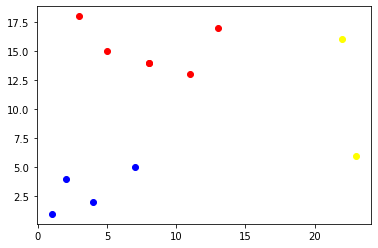

In [14]:
## TODO: Visualization (3 clusters)
colors = ['blue', 'red', 'yellow']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:,0], cluster[:,1], c=colors[i])